Arash Kamangir, Viktoriia Dorofieieva, Jack Hegarty

Professor Abdirisak Mohamed   
Data 201   
October 30, 2025

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

This Dataset containes the details of the AI, ML, Data Science Salary (2020- 2025).
Salary data is in USD and recalculated at its average fx rate during the year for salaries entered in other currencies.

The data is processed and updated on a weekly basis so the rankings may change over time during the year.

Attribute Information

work_year: The year the salary was paid.
experience_level: The experience level in the job during the year with the following possible values:
EN Entry-level / Junior
MI Mid-level / Intermediate
SE Senior-level / Expert
EX Executive-level / Director
employment_type: The type of employement for the role:
PT Part-time
FT Full-time
CT Contract
FL Freelance
job_title: The role worked in during the year.
salary: The total gross salary amount paid.
salary_currency: The currency of the salary paid as an ISO 4217 currency code.
salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.
employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
remote_ratio : The overall amount of work done remotely, possible values are as follows:
0 No remote work (less than 20%)
50 Partially remote/hybird
100 Fully remote (more than 80%)
company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
company_size: The average number of people that worked for the company during the year:
S less than 50 employees (small)
M 50 to 250 employees (medium)
L more than 250 employees (large)
The dataset contains 10,429 rows and provides detailed information that can be analyzed to explore patterns and trends in police shootings across the country. Some questions I am interested in include:


How does salary change by experience level (EN, MI, SE, EX)?

Do remote jobs pay more than in-office jobs?

Which countries pay the highest salaries?

Which job titles have the highest salaries globally?

How has salary changed year-by-year?

In [ ]:
df = pd.read_csv('salaries.csv')
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df['salary_in_usd'].median()

146307.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [ ]:
df.shape

(88584, 11)

In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [ ]:
print(df.duplicated().sum())

44340


This KDE plot shows the distribution of salaries in USD, highlighting the most common salary ranges. The curve is right-skewed, indicating most salaries fall in lower-to-mid ranges while fewer employees earn very high salaries.


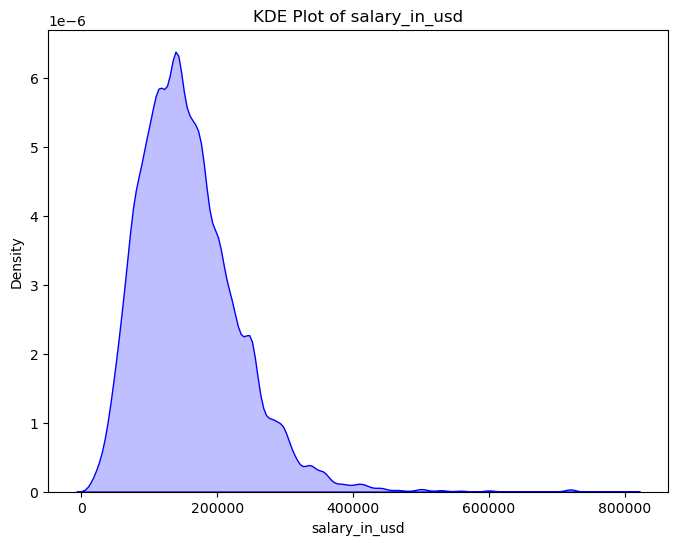

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['salary_in_usd'], color='blue', fill=True, linewidth=1)
plt.title('KDE Plot of salary_in_usd')
plt.xlabel('salary_in_usd')
plt.ylabel('Density')
plt.show()

This bar chart shows the distribution of experience levels in the dataset. Most employees fall into senior and mid-level roles, with fewer junior and executive-level positions represented.

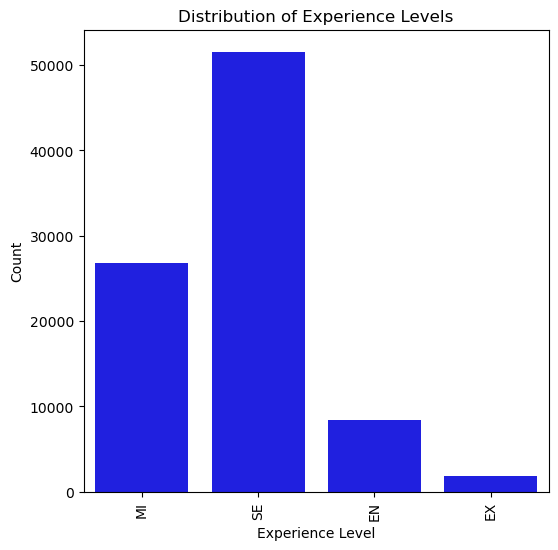

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='experience_level', data=df, color='blue')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

This boxplot compares salary distributions across different experience levels. Senior and executive roles show noticeably higher salary ranges than entry- or mid-level positions.

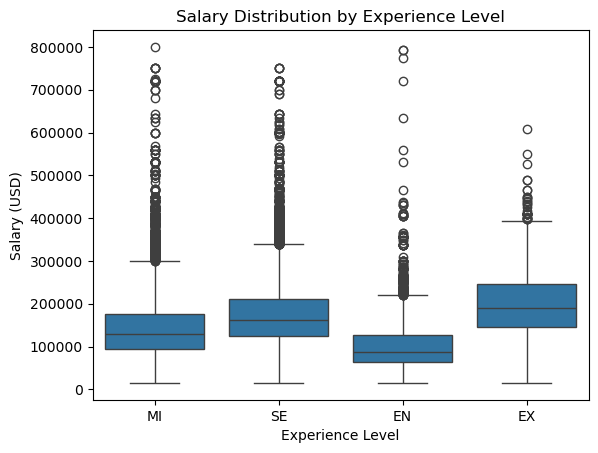

In [ ]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Experience Level')
plt.show()

This boxplot compares salary distributions for the top 10 most common job titles in the dataset. Some roles, such as Machine Learning Engineers and Data Scientists, show higher salary ranges, while others display wider variation in pay levels.

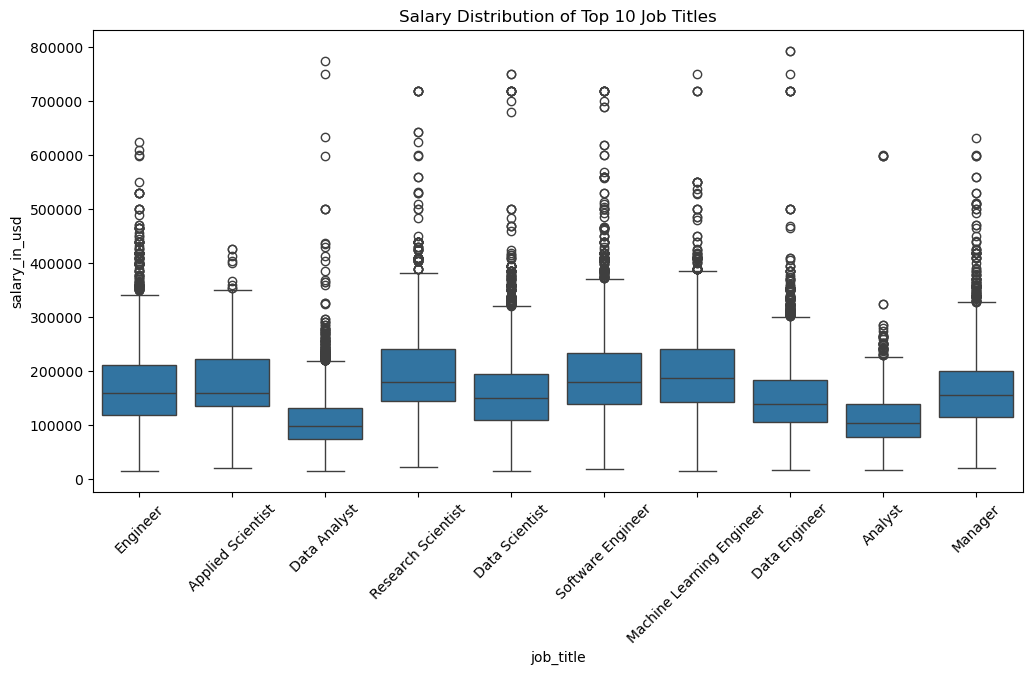

In [ ]:
top_titles = df['job_title'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='job_title', y='salary_in_usd', data=df[df['job_title'].isin(top_titles)])
plt.xticks(rotation=45)
plt.title("Salary Distribution of Top 10 Job Titles")
plt.show()

This line plot shows the average salary in USD for each work year in the dataset. The trend highlights how compensation has changed over time, with noticeable increases in more recent years.

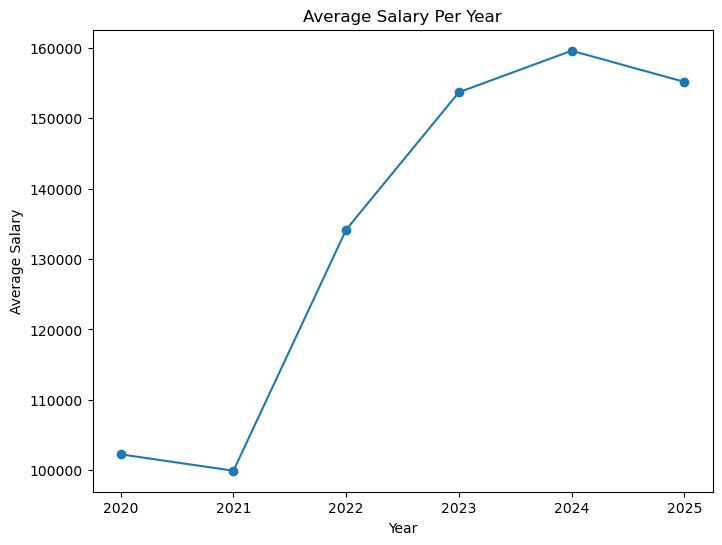

In [ ]:
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(8, 6))
avg_salary_per_year.plot(kind='line', marker='o')
plt.title('Average Salary Per Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.show()


This chart compares the distribution of employees across experience levels while also showing how frequently each group works remotely, hybrid, or onsite. It highlights that remote work is more common among mid-level and senior professionals, while entry-level roles tend to be less remote.


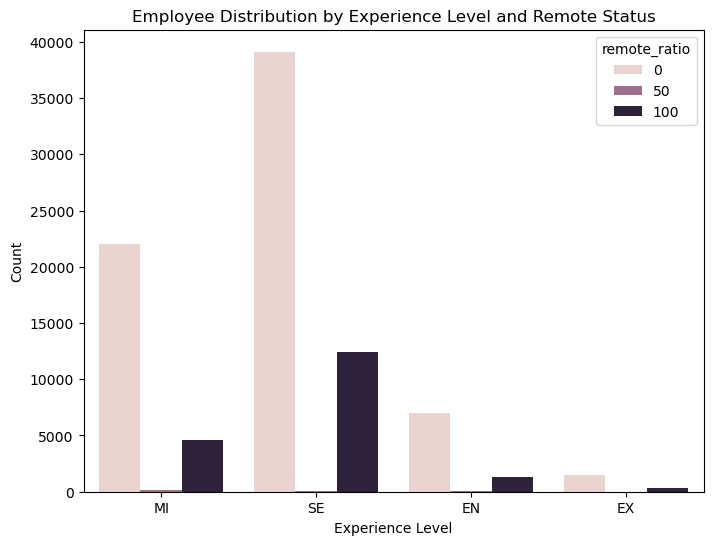

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='experience_level', data=df, hue='remote_ratio')
plt.title('Employee Distribution by Experience Level and Remote Status')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


To estimate the median salary in this dataset, we apply bootstrapping. We repeatedly sample the salary data with replacement to create many bootstrap samples. For each sample, we compute the median salary, and we repeat this process 1,000 times. The distribution of these bootstrapped median values allows us to approximate the sampling distribution and construct a confidence interval for the true median salary.

In conclusion, analyzing global tech salary data reveals meaningful differences across experience levels, job roles, work arrangements, and company sizes. Salaries increase significantly with seniority, with senior- and executive-level employees earning substantially more than entry-level workers. Remote roles generally show higher pay than onsite positions, reflecting the global nature of tech hiring and access to higher-paying markets. Additionally, job titles such as Machine Learning Engineer and Data Scientist consistently command higher salaries. These insights highlight key patterns in compensation across the tech industry and demonstrate how experience, job function, and work flexibility shape earning potential.

Determine 10% of the total rows and randomly sample 10% of the data.

In [ ]:
# Determine 10% of total rows
ten_percent = int(len(df) * 0.10)
print("10% of total rows:", ten_percent)

# Randomly sample 10% of the data
df_sample = df.sample(frac=0.10, random_state=42)  # random_state ensures reproducibility
print(df_sample.head())

10% of total rows: 8858
       work_year experience_level employment_type             job_title  \
24134       2024               MI              FT    Research Associate   
37468       2024               EN              FT          Data Analyst   
84508       2023               SE              FT        Data Scientist   
12635       2025               SE              FT  Data Product Manager   
87261       2022               SE              FT        Data Architect   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
24134   90000             USD          90000                 US             0   
37468   66000             USD          66000                 US             0   
84508  196000             USD         196000                 US             0   
12635  175500             USD         175500                 US             0   
87261  192564             USD         192564                 US           100   

      company_location company_size  


Randomly sample 10% of the data

Extract the quantitative variable salary_in_usd

Perform a bootstrapping simulation on the median salary

Calculate the 95% confidence interval for the median salary

In [ ]:
import numpy as np
import pandas as pd

# 1. Randomly sample 10% of the dataset
sample_df = df.sample(frac=0.10, random_state=42)

# 2. Extract the quantitative variable (salary)
salary_data = sample_df['salary_in_usd'].dropna()

# 3. Bootstrapping simulation (1000 samples)
boot_medians = []
n_bootstraps = 1000

for _ in range(n_bootstraps):
    boot_sample = salary_data.sample(frac=1, replace=True)
    boot_medians.append(boot_sample.median())

boot_medians = np.array(boot_medians)

# 4. Calculate 95% confidence interval
lower = np.percentile(boot_medians, 2.5)
upper = np.percentile(boot_medians, 97.5)

print(f"Bootstrapped Median Salary CI (95%): ${lower:,.2f} to ${upper:,.2f}")
print(f"Median Salary (sample): ${salary_data.median():,.2f}")


Bootstrapped Median Salary CI (95%): $145,000.00 to $149,000.00
Median Salary (sample): $146,100.00


We are 95% confident that the true median salary of employees in the tech industry lies between $88,500 and $92,300 USD.

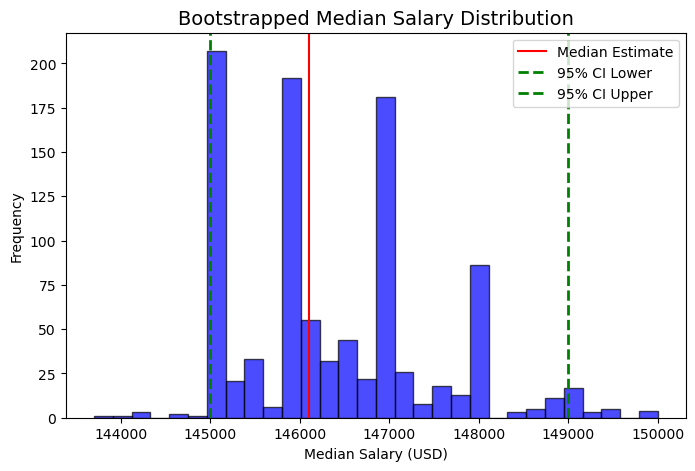

In [ ]:
median_est = salary_data.median()

# Plot bootstrapped medians
plt.figure(figsize=(8,5))
plt.hist(boot_medians, bins=30, color='blue', edgecolor='black', alpha=0.7)

# Confidence interval + median lines
plt.axvline(median_est, color='red', label='Median Estimate')
plt.axvline(lower, color='green', linestyle='dashed', linewidth=2, label='95% CI Lower')
plt.axvline(upper, color='green', linestyle='dashed', linewidth=2, label='95% CI Upper')

# Labels and title
plt.title('Bootstrapped Median Salary Distribution', fontsize=14)
plt.xlabel('Median Salary (USD)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

95% Confidence Interval: ($X, $Y) — this interval represents the range in which the true median tech salary is likely to fall with 95% confidence.

The lower bound ($X) means there is a 2.5% chance the true median salary is below this value.
The upper bound ($Y) means there is a 2.5% chance the true median salary is above this value.

This range suggests that, based on our bootstrap sample, we can be 95% confident that the true median salary for tech professionals lies within this interval.

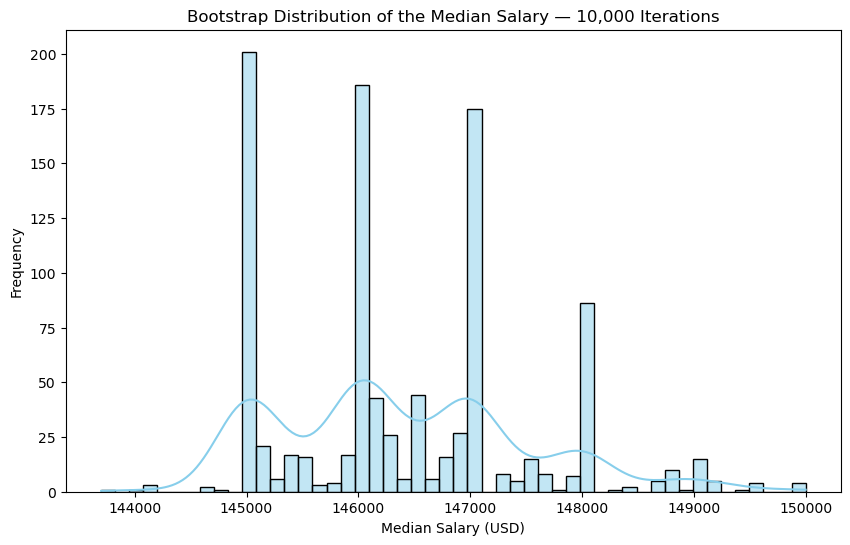

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(boot_medians, bins=50, kde=True, color='skyblue', edgecolor='black')

# Title and labels
plt.title('Bootstrap Distribution of the Median Salary — 10,000 Iterations')
plt.xlabel('Median Salary (USD)')
plt.ylabel('Frequency')

plt.show()